In [3]:
# tabular data
import numpy as np
import pandas as pd

# data visuals
import matplotlib.pyplot as plt
import seaborn as sns

# data
from wrangle import wrangle_zillow

# stats and preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

In [4]:
train, validate, test = wrangle_zillow()

In [172]:
train.columns

Index(['beds', 'baths', 'square_feet', 'tax_value', 'year_built', 'tax_amount',
       'fips'],
      dtype='object')

In [173]:
train.shape

(1069570, 7)

**Notes:**
* It seems for this question you first need to use something to identify a subset of varibales that will be useful for scaling (determining if something is discrete or continuous)
    * Beds and baths are more discrete type of measurments so I would prefer to use them as such. I'll ask about it. 

**Actions:**
* in the cleaning phase, add a step that changes fips and year to objects

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Setup:

In [5]:
# getting non-object columns,  
scale_cols = [col for col in train if train[col].dtype != 'O' and col != 'tax_value']

# another way
scale_cols = train.drop(columns=['tax_value',
                                'fips',
                                 'year_built']).columns.to_list()

In [9]:
X = train.drop(columns='tax_value')
y = train[['tax_value']]

In [14]:
X_scaled = X.copy()

In [15]:
# make scaler
scaler = MinMaxScaler().fit(X_scaled[scale_cols])

In [16]:
# transform 
X_scaled[scale_cols] = scaler.transform(X_scaled[scale_cols])

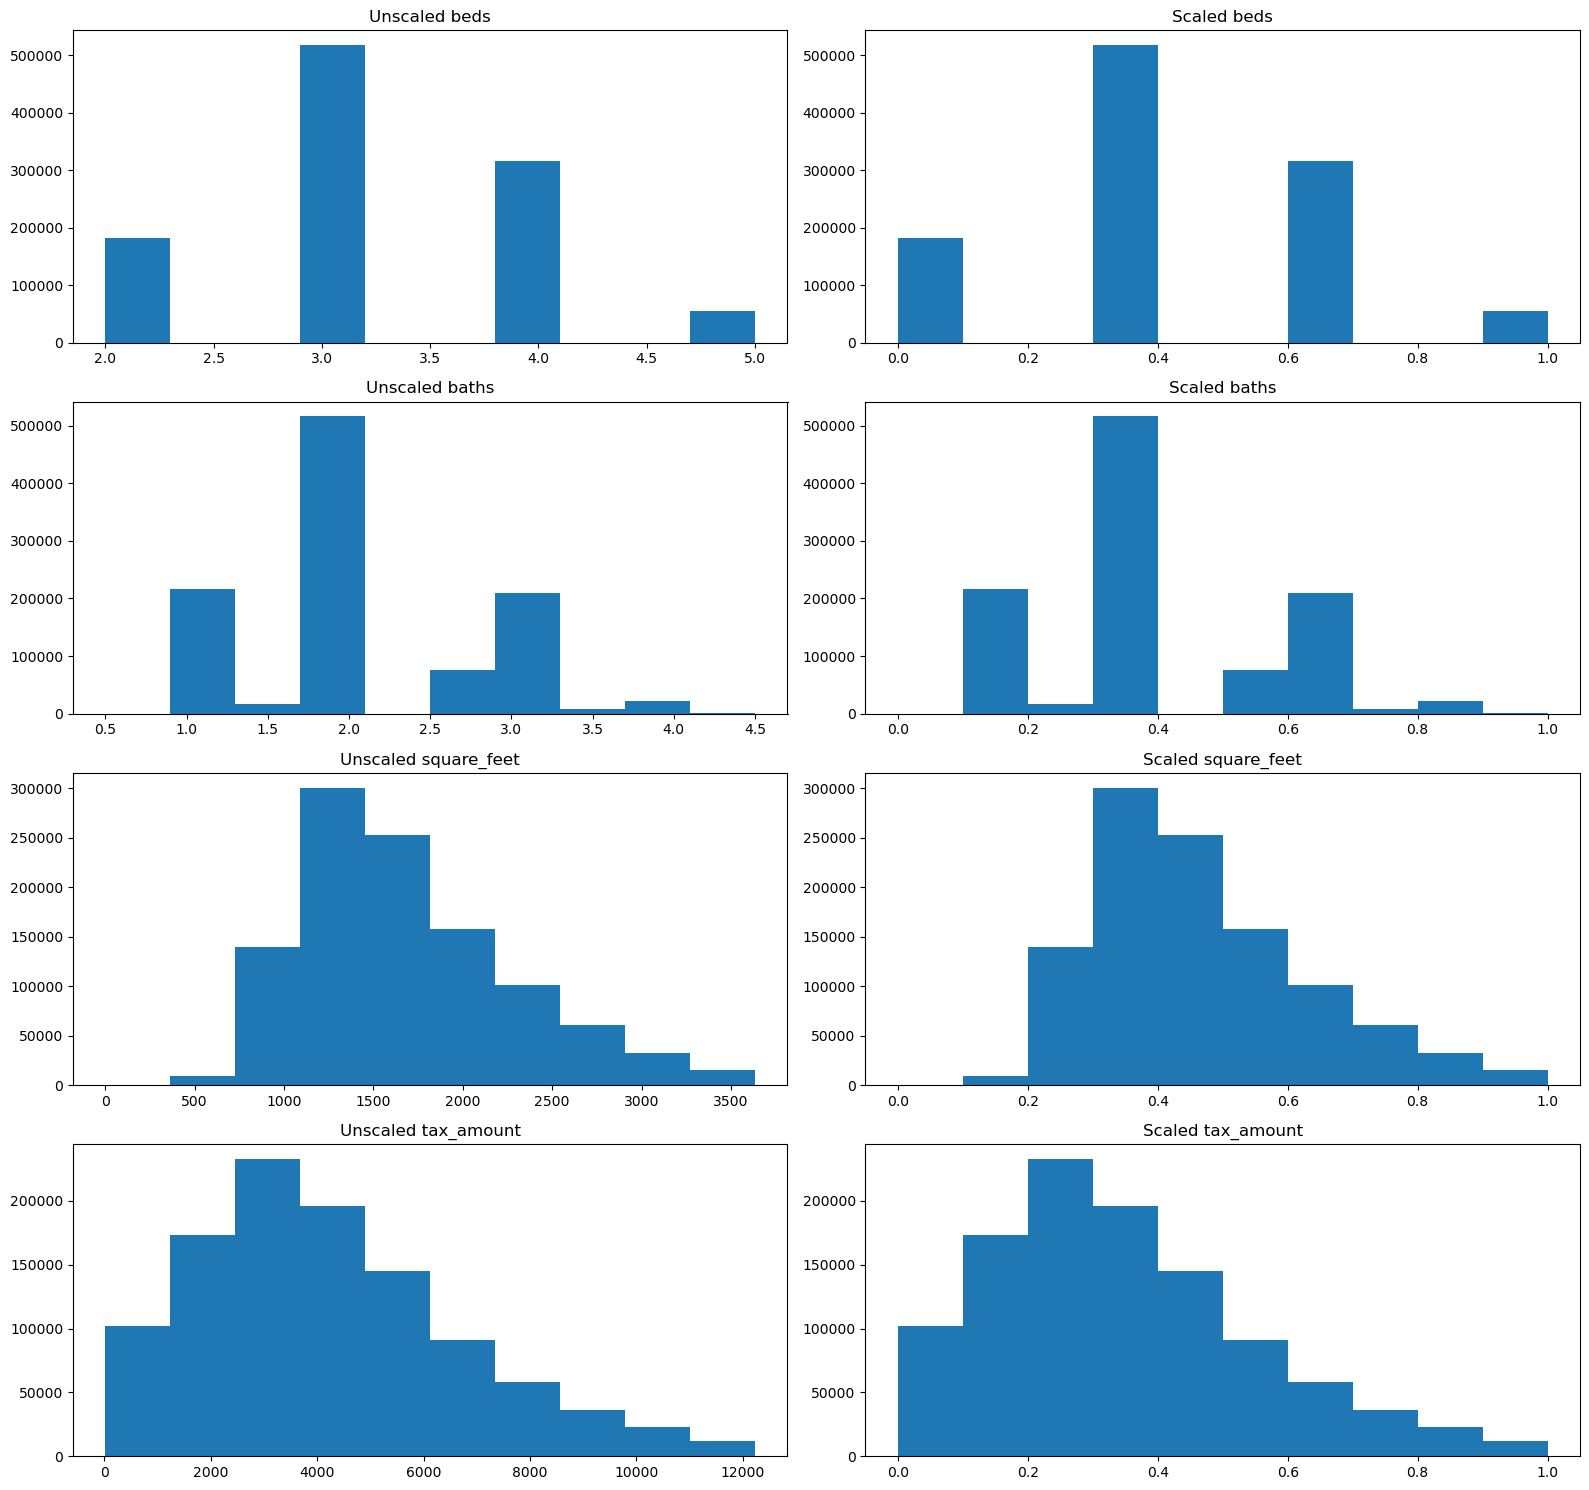

In [19]:
fig, axs = plt.subplots(len(scale_cols), 2, figsize=(16, 15))


for (ax1, ax2), col in zip(axs, scale_cols):
    ax1.hist(X[col])
    ax1.set(title=f'Unscaled {col}')
    
    ax2.hist(X_scaled[col])
    ax2.set(title=f'Scaled {col}')
plt.tight_layout()
plt.show()

#### MinMax

In [138]:
# make scaler
scaler = MinMaxScaler()

In [139]:
# create scaler
scaler.fit(train[scale_cols])

MinMaxScaler()

In [140]:
# transform 
train_scaled = scaler.transform(train[scale_cols])

In [62]:
train_scaled[0]

array([0.66666667, 0.625     , 0.8777533 , 0.71061314])

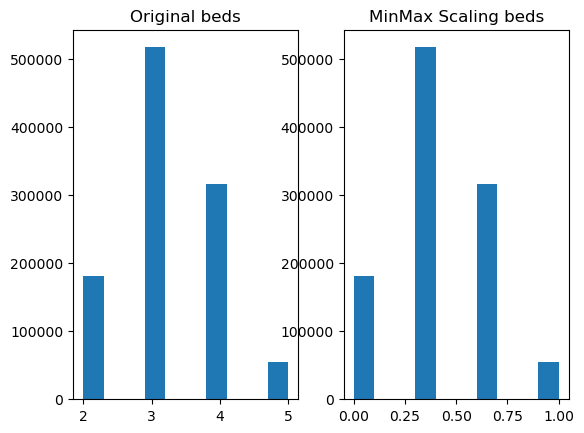

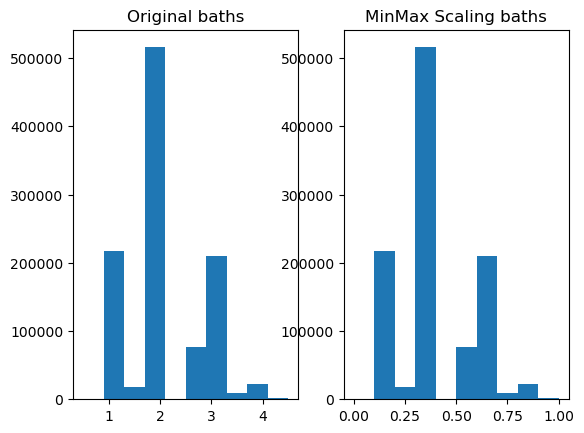

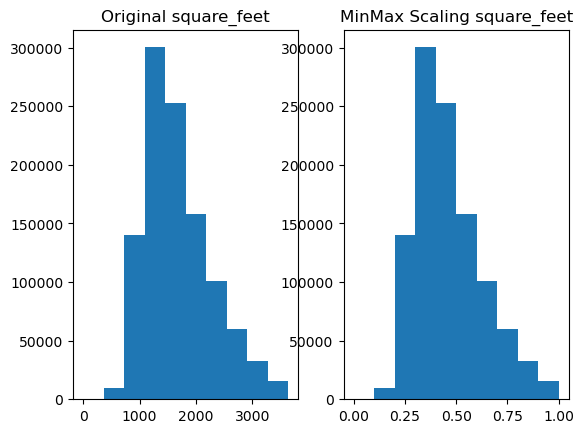

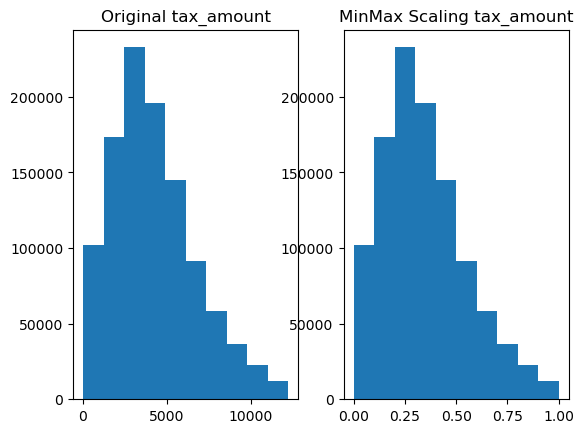

In [141]:
# data visual for each 
for i, col in enumerate(X_train):
    plt.subplot(1,2,1)
    X_train.iloc[:,i].hist()
    plt.grid()
    plt.title(f'Original {col}')
    
    plt.subplot(1,2,2)
    plt.hist(train_scaled[:,i])
    plt.title(f'MinMax Scaling {col}')
    plt.show()

**Notes**:
* The first two are the bedrooms and bathrooms which makes sense why it looks that way
* The squarefeet and the tax amount are the second ones

**Actions:**
* Find a way to label the scaled data

#### StandardScaler

In [70]:
# make it
scaler = preprocess.StandardScaler()

In [74]:
# fit it
scaler.fit(X_train)

StandardScaler()

In [76]:
train_scaled = scaler.transform(X_train)

In [83]:
X_train.iloc[:,0].describe()

count    1.069570e+06
mean     3.228751e+00
std      7.870331e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: beds, dtype: float64

In [90]:
len(X_train.columns)

4

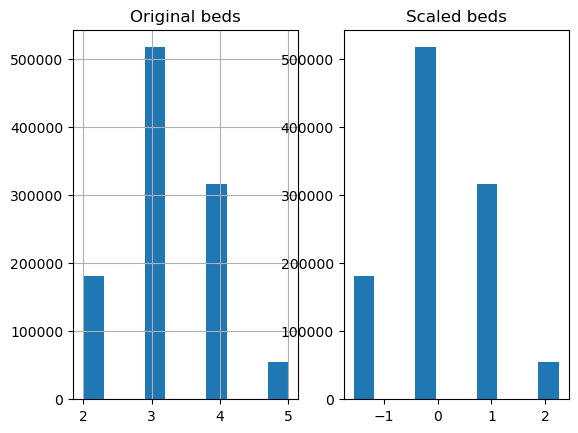

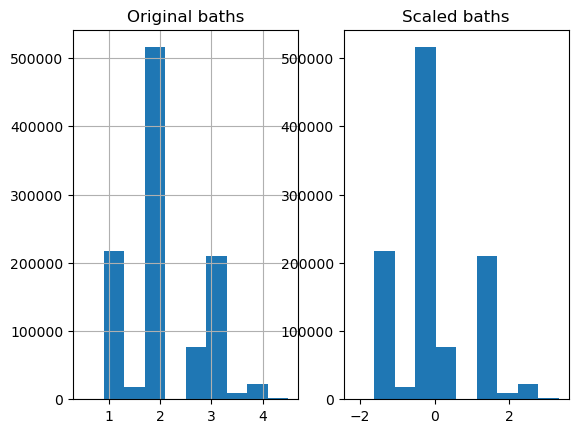

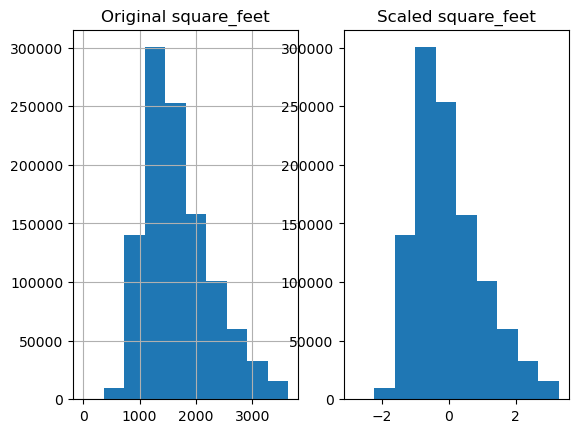

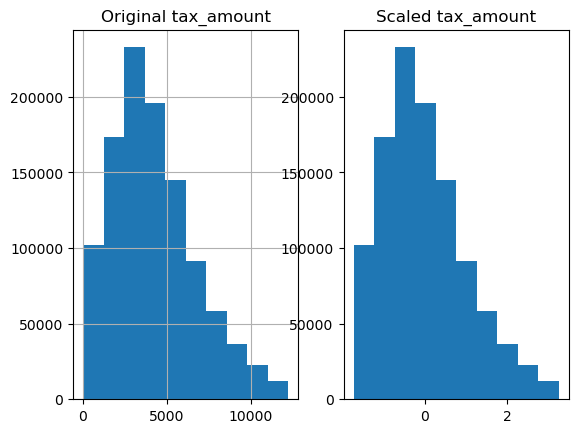

In [93]:
# data visual for each 
for i, col in enumerate(X_train):
    plt.subplot(1,2,1)
    X_train.iloc[:,i].hist()
    plt.title(f'Original {col}')
    
    plt.subplot(1,2,2)
    plt.hist(train_scaled[:,i])
    plt.title(f'Scaled {col}')
    plt.show()

#### RobustScaler

In [94]:
# make the scaler
scaler = preprocess.RobustScaler()

In [95]:
# fit it
scaler.fit(X_train)

RobustScaler()

In [96]:
# transform
train_scaled = scaler.transform(X_train)

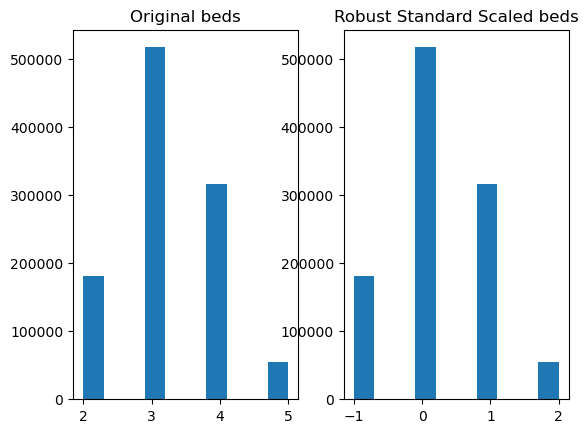

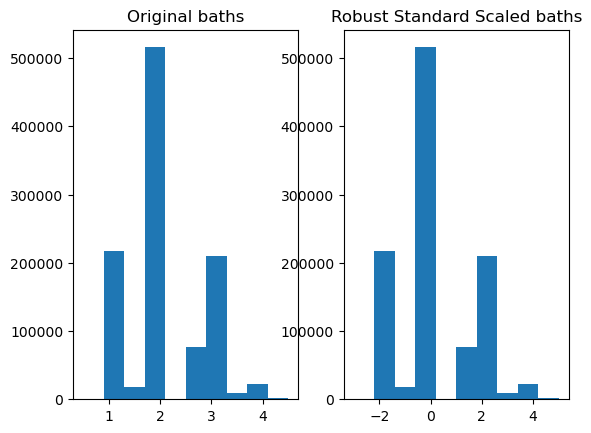

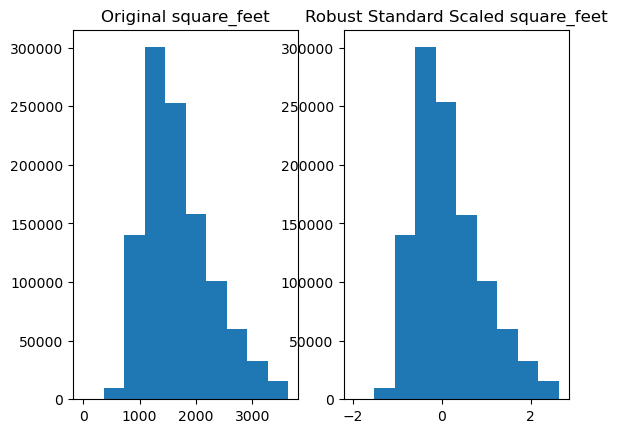

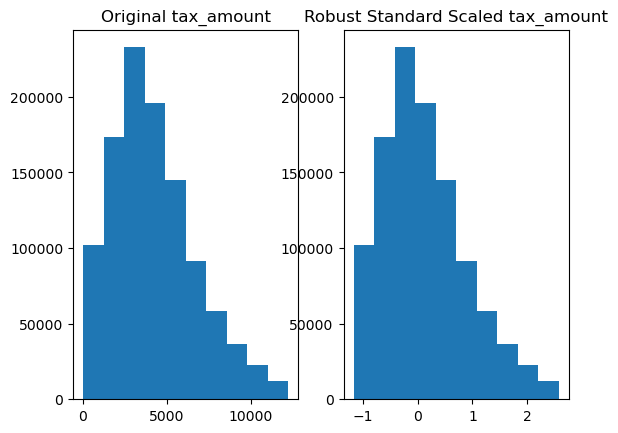

In [98]:
# data visual for each 
for i, col in enumerate(X_train):
    plt.subplot(1,2,1)
    X_train.iloc[:,i].hist()
    plt.grid()
    plt.title(f'Original {col}')
    
    plt.subplot(1,2,2)
    plt.hist(train_scaled[:,i])
    plt.title(f'Robust Standard Scaled {col}')
    plt.show()

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [119]:
pd.DataFrame(scaler.inverse_transform(train_scaled))

,0,1,2,3
0,4.0,3.0,3190.0,8698.22
1,4.0,2.0,1292.0,3174.66
2,3.0,2.0,1712.0,1604.10
3,4.0,3.0,2565.0,8346.21
4,4.0,2.5,2463.0,6615.28
...,...,...,...,...
1069565,3.0,2.0,1600.0,2921.35
1069566,4.0,2.0,1856.0,4424.20
1069567,3.0,1.0,1388.0,9749.18
1069568,3.0,2.0,1050.0,3937.12


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [121]:
scaler = preprocess.QuantileTransformer(output_distribution='normal')

In [123]:

scaler.fit(X_train)

QuantileTransformer(output_distribution='normal')

In [129]:
# making it a datframe with the same index and columns as the X train
train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

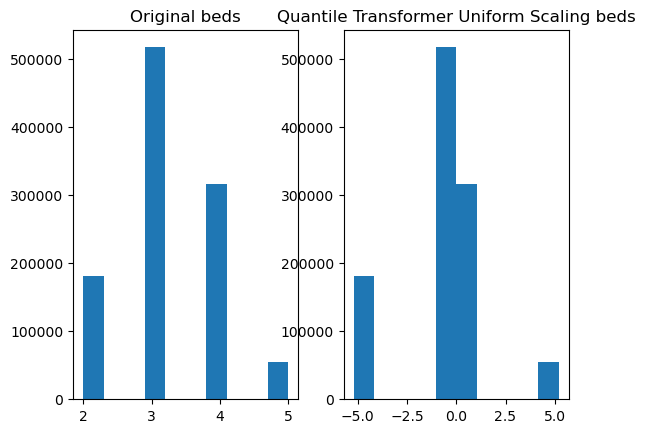

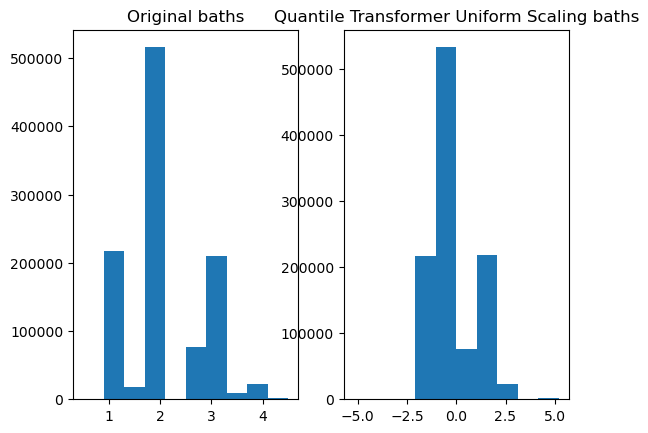

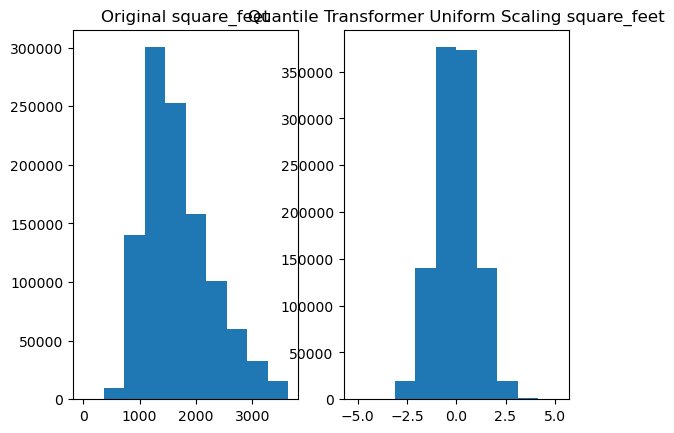

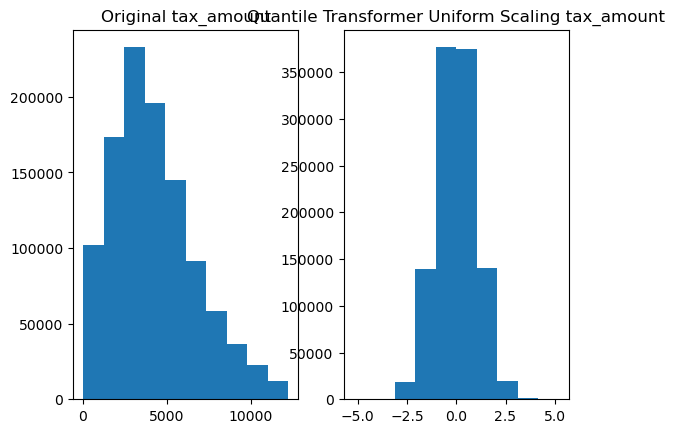

In [133]:
# data visual for each 
for i, col in enumerate(X_train):
    plt.subplot(1,2,1)
    X_train.iloc[:,i].hist()
    plt.grid()
    plt.title(f'Original {col}')
    
    plt.subplot(1,2,2)
    train_scaled.iloc[:,i].hist()
    plt.title(f'Quantile Transformer Uniform Scaling {col}')
    plt.grid()
    plt.show()

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [134]:
scaler = preprocess.QuantileTransformer()

In [135]:

scaler.fit(X_train)

QuantileTransformer()

In [136]:
# making it a datframe with the same index and columns as the X train
train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

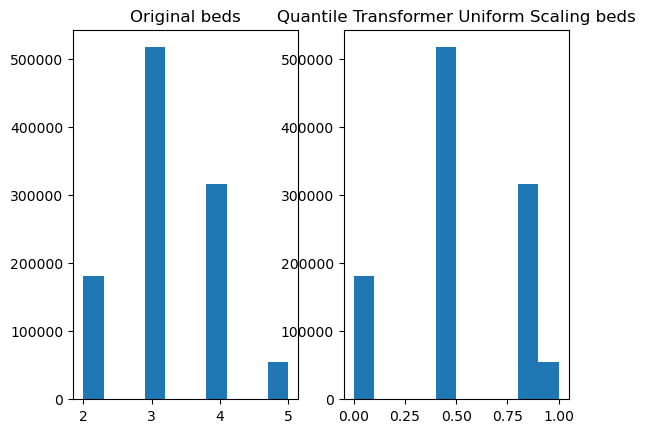

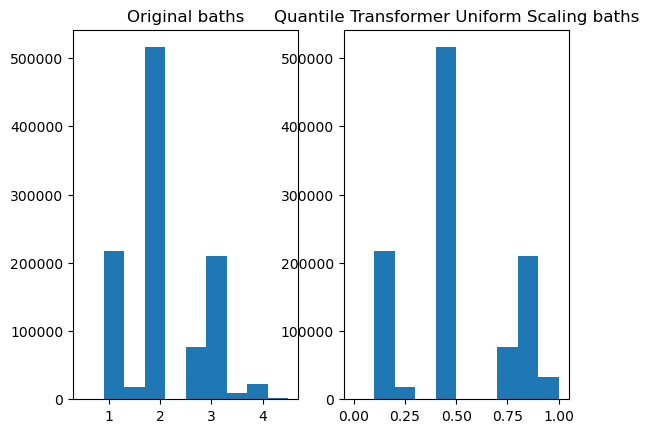

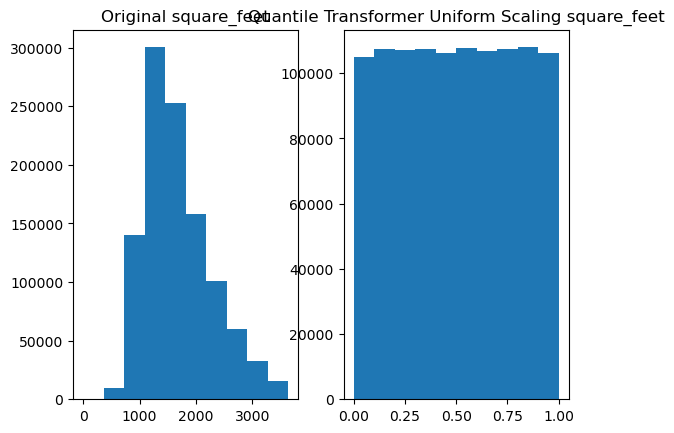

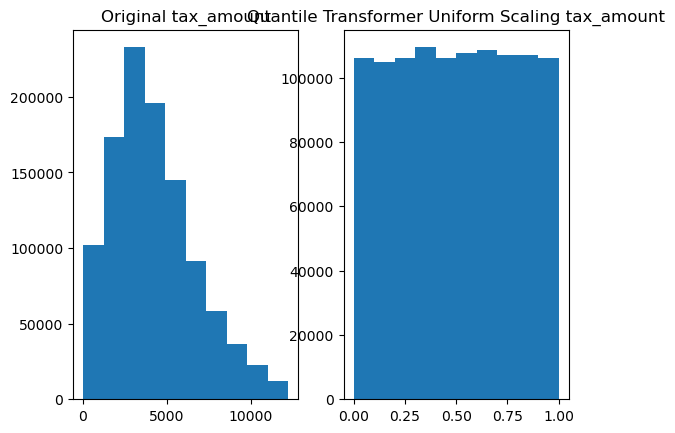

In [137]:
# data visual for each 
for i, col in enumerate(X_train):
    plt.subplot(1,2,1)
    X_train.iloc[:,i].hist()
    plt.grid()
    plt.title(f'Original {col}')
    
    plt.subplot(1,2,2)
    train_scaled.iloc[:,i].hist()
    plt.title(f'Quantile Transformer Uniform Scaling {col}')
    plt.grid()
    plt.show()

The last two are much different than before and the x-axis is differnty from the one with the normal argument for the output_distrubution

### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
from wrangle import wrangle_zillow
from preprocess import scale_data

In [11]:
def scale_zillow():
    '''
    Arguments: none
    Actions: Scales all non-object and non-target features with MinMaxScaler
    Returns: train, validate, and test datasets all scaled
    Modules:
        1. from wrangle import wrangle_zillow
        2. from preprocess import scale_data
    '''
    # get data
    train, validate, test = wrangle_zillow()
    
    # assign target
    target = 'tax_amount'
    
    # get list of columns to scale
    scale_cols = [col for col in train if train[col].dtype != 'O' and col != target]
    
    # exit function and return scaled data
    return scale_data(train, scale_cols, scaler='minmax', X_validate=validate, X_test=test)

In [12]:
scale_zillow()

(             beds  baths  square_feet  tax_value
 9100     0.666667  0.625     0.877753   0.773557
 1246696  0.666667  0.375     0.355176   0.256280
 485071   0.333333  0.375     0.470815   0.126384
 438063   0.666667  0.625     0.705672   0.667434
 1528007  0.666667  0.500     0.677588   0.614041
 ...           ...    ...          ...        ...
 469465   0.333333  0.375     0.439978   0.206005
 1965407  0.666667  0.375     0.510463   0.325572
 1166639  0.333333  0.125     0.381608   0.766354
 108966   0.333333  0.375     0.288546   0.303591
 1419427  0.333333  0.375     0.613711   0.375309
 
 [1069570 rows x 4 columns],
              beds  baths  square_feet  tax_value
 343061   0.666667  0.500     0.506057   0.394518
 69717    0.666667  0.375     0.472467   0.275927
 1378899  0.666667  0.625     0.493667   0.464884
 1413694  1.000000  0.875     0.735407   0.780943
 763033   0.666667  0.500     0.521476   0.170963
 ...           ...    ...          ...        ...
 1964218  0.333333 

In [170]:
# basic mvp version
def standard_scaler(X_train, 
                    col_list):
    '''
    Arguments:
    Actions:
    Returns:
    Modules: 
    '''
    
    X_train_to_scale = X_train[col_list]
    
    # make it
    scaler = StandardScaler()
    
    # fit it
    scaler.fit(X_train_to_scale)

    # transorm data into a dataframe
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    return X_train_scaled 

# Template Version

In [23]:
def scale_data(scaler, X_train, col_list, X_validate = None, X_test = None):
    '''
    Argumments:
        Required: X_train dataframe, list of columns to be scaled (should be continuous data), type of scaler ('standard', 'robust', 'minmax')
        Optional: X_validate dataframe, X_test dataframe
    Actions: Calls functions for specific scaler specified in the arguments
    Returns: scaled dataframe
    Modules:
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import numpy as np
        3. import pandas as pd       
    '''
  
    # Create a dataframe with only the columns that need to be scaled
    X_train_to_scale = X_train[col_list]
    
    # fit the scaled to the dataframe
    scaler.fit(X_train_to_scale)

    # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    # OPTIONALS
    # if X_validate is a pandas dataframe
    if isinstance(X_validate, pd.DataFrame):
        
        # Create a dataframe with only the columns that need to be scaled
        X_validate_to_scale = X_validate[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled validate data
        return X_train_scaled, X_validate_scaled
        
    # if X_test is a pandas dataframe
    if isinstance(X_test, pd.DataFrame):

        # Create a dataframe with only the columns that need to be scaled
        X_test_to_scale = X_test[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled test data
        return X_train_scaled, X_test_scaled
    
    
    # with no keyword arguments(optional), the function will exist wiuth only the scaled train data
    return X_train_scaled    
    

In [22]:
# train, validate, test

In [25]:
scale_data(MinMaxScaler(), train, scale_cols, X_validate=validate, X_test=test)

(             beds  baths  square_feet  tax_amount
 9100     0.666667  0.625     0.877753    0.710613
 1246696  0.666667  0.375     0.355176    0.258385
 485071   0.333333  0.375     0.470815    0.129799
 438063   0.666667  0.625     0.705672    0.681793
 1528007  0.666667  0.500     0.677588    0.540077
 ...           ...    ...          ...         ...
 469465   0.333333  0.375     0.439978    0.237646
 1965407  0.666667  0.375     0.510463    0.360688
 1166639  0.333333  0.125     0.381608    0.796658
 108966   0.333333  0.375     0.288546    0.320810
 1419427  0.333333  0.375     0.613711    0.379096
 
 [1069570 rows x 4 columns],
              beds  baths  square_feet  tax_amount
 343061   0.666667  0.500     0.506057    0.409324
 69717    0.666667  0.375     0.472467    0.303084
 1378899  0.666667  0.625     0.493667    0.465708
 1413694  1.000000  0.875     0.735407    0.826523
 763033   0.666667  0.500     0.521476    0.149539
 ...           ...    ...          ...         ...


In [233]:
def scale_data(X_train, col_list, scaler, X_validate = None, X_test = None):
    '''
    Argumments:
        Required: X_train dataframe, list of columns to be scaled (should be continuous data), type of scaler ('standard', 'robust', 'minmax')
        Optional: X_validate dataframe, X_test dataframe
    Actions: Calls functions for specific scaler specified in the arguments
    Returns: scaled dataframe
    Modules:
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import numpy as np
        3. import pandas as pd       
    '''
    
    # when scaler is string literal 'standard'
    if scaler == 'standard':
        
        # call standard scaler function with arguments from main function specified
        return standard_scaler(X_train, col_list, X_validate=X_validate, X_test=X_test)
    
    # when scaler is string literal 'robust'
    elif scaler == 'robust':
        
        # call robust scaler function with arguments from main function specified
        return robust_scaler(X_train, col_list, X_validate=X_validate, X_test=X_test)
    
    # when scaler is string literal 'minmax'
    elif scaler == 'minmax':
        
        # call min max scaler function with arguments from main function specified
        return min_max_scaler(X_train, col_list, X_validate=X_validate, X_test=X_test)
    
    # when scaler is anything else
    else:
        
        # prompt user to try again
        return print('Please specify the scaler from this list [\'standard\', \'robust\', \'minmax\']')

In [214]:
def standard_scaler(X_train, 
                    col_list,
                    X_validate = None,
                    X_test = None
                   ):
    '''
    Arguments: 
        Required: X_train dataframe, list of columns to be scaled (should be continuous data)
        Optional: X_validate dataframe, X_test dataframe
    Actions:
        1. Create df to be scaled from X_train
        2. Initialize the scaler
        3. Fit the scaler to train only
        4. Create a dataframe with the scaled train data
        5. If DataFrames are used in keyword arguments:
            a. Create a dataframe to be scaled from X_validate or X_test
            b. Create a dataframe with the scaled validate or test data
    Returns: scaled dataframe
    Modules: 
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import pandas as pd
    '''
    
    # Create a dataframe with only the columns that need to be scaled
    X_train_to_scale = X_train[col_list]
    
    # initiailize the scaler
    scaler = StandardScaler()
    
    # fit the scaled to the dataframe
    scaler.fit(X_train_to_scale)

    # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    # OPTIONALS
    # if X_validate is a pandas dataframe
    if isinstance(X_validate, pd.DataFrame):
        
        # Create a dataframe with only the columns that need to be scaled
        X_validate_to_scale = X_validate[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled validate data
        return X_train_scaled, X_validate_scaled
        
    # if X_test is a pandas dataframe
    if isinstance(X_test, pd.DataFrame):

        # Create a dataframe with only the columns that need to be scaled
        X_test_to_scale = X_test[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled test data
        return X_train_scaled, X_test_scaled
    
    
    # with no keyword arguments(optional), the function will exist wiuth only the scaled train data
    return X_train_scaled

In [213]:
def robust_scaler(X_train, 
                    col_list,
                    X_validate = None,
                    X_test = None
                   ):
    '''
    Arguments: 
        Required: X_train dataframe, list of columns to be scaled (should be continuous data)
        Optional: X_validate dataframe, X_test dataframe
    Actions:
        1. Create df to be scaled from X_train
        2. Initialize the scaler
        3. Fit the scaler to train only
        4. Create a dataframe with the scaled train data
        5. If DataFrames are used in keyword arguments:
            a. Create a dataframe to be scaled from X_validate or X_test
            b. Create a dataframe with the scaled validate or test data
    Returns: scaled dataframe
    Modules: 
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import pandas as pd
    '''
    
    # Create a dataframe with only the columns that need to be scaled
    X_train_to_scale = X_train[col_list]
    
    # initiailize the scaler
    scaler = RobustScaler()
    
    # fit the scaled to the dataframe
    scaler.fit(X_train_to_scale)

    # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    # OPTIONALS
    # if X_validate is a pandas dataframe
    if isinstance(X_validate, pd.DataFrame):
        
        # Create a dataframe with only the columns that need to be scaled
        X_validate_to_scale = X_validate[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled validate data
        return X_train_scaled, X_validate_scaled
        
    # if X_test is a pandas dataframe
    if isinstance(X_test, pd.DataFrame):

        # Create a dataframe with only the columns that need to be scaled
        X_test_to_scale = X_test[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled test data
        return X_train_scaled, X_test_scaled
    
    
    # with no keyword arguments(optional), the function will exist wiuth only the scaled train data
    return X_train_scaled

In [225]:
def min_max_scaler(X_train, 
                    col_list,
                    X_validate = None,
                    X_test = None
                   ):
    '''
    Arguments: 
        Required: X_train dataframe, list of columns to be scaled (should be continuous data)
        Optional: X_validate dataframe, X_test dataframe
    Actions:
        1. Create df to be scaled from X_train
        2. Initialize the scaler
        3. Fit the scaler to train only
        4. Create a dataframe with the scaled train data
        5. If DataFrames are used in keyword arguments:
            a. Create a dataframe to be scaled from X_validate or X_test
            b. Create a dataframe with the scaled validate or test data
    Returns: scaled dataframe
    Modules: 
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import pandas as pd
    '''
    
    # Create a dataframe with only the columns that need to be scaled
    X_train_to_scale = X_train[col_list]
    
    # initiailize the scaler
    scaler = MinMaxScaler()
    
    # fit the scaled to the dataframe
    scaler.fit(X_train_to_scale)

    # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    # OPTIONALS
    # if X_validate is a pandas dataframe
    if isinstance(X_validate, pd.DataFrame):
        
        # Create a dataframe with only the columns that need to be scaled
        X_validate_to_scale = X_validate[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled validate data
        return X_train_scaled, X_validate_scaled
        
    # if X_test is a pandas dataframe
    if isinstance(X_test, pd.DataFrame):

        # Create a dataframe with only the columns that need to be scaled
        X_test_to_scale = X_test[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled test data
        return X_train_scaled, X_test_scaled
    
    
    # with no keyword arguments(optional), the function will exist wiuth only the scaled train data
    return X_train_scaled

In [142]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

# Robust tinkering with options

In [10]:
def standard_scaler(X_train, 
                    col_list,
                    X_validate = None,
                    X_test = None
                   ):
    '''
    Arguments: 
        Required: X_train dataframe, list of columns to be scaled (should be continuous data)
        Optional: X_validate dataframe, X_test dataframe
    Actions:
        1. Create df to be scaled from X_train
        2. Initialize the scaler
        3. Fit the scaler to train only
        4. Create a dataframe with the scaled train data
        5. If DataFrames are used in keyword arguments:
            a. Create a dataframe to be scaled from X_validate or X_test
            b. Create a dataframe with the scaled validate or test data
    Returns: scaled dataframe
    Modules: 
        1. from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
        2. import pandas as pd
    '''
    
    # Create a dataframe with only the columns that need to be scaled
    X_train_to_scale = X_train[col_list]
    
    # initiailize the scaler
    scaler = StandardScaler()
    
    # fit the scaled to the dataframe
    scaler.fit(X_train_to_scale)

    # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
    # OPTIONALS
    # if X_validate and X_test are pandas dataframes
    if isinstance(X_validate, pd.DataFrame) and isinstance(X_test, pd.DataFrame):
        
        # Create a dataframe with only the columns that need to be scaled
        X_validate_to_scale = X_validate[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)

        # Create a dataframe with only the columns that need to be scaled
        X_test_to_scale = X_test[col_list]
        
        # scale the data and make the array a dataframe with the same columns and same index as the original and assign it to a variable
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
        
        # Exit the funciton and return the scaled train data and the scaled test data
        return X_train_scaled, X_validate_scaled, X_test_scaled
    
    # with no keyword arguments(optional), the function will exist wiuth only the scaled train data
    return X_train_scaled

In [9]:
standard_scaler(train, scale_cols)

NameError: name 'scale_cols' is not defined

Setup

In [71]:
# getting non-object columns,  
scale_cols = [col for col in train if train[col].dtype != 'O' and col != 'tax_value']

In [210]:
# X_train = train[scale_cols]
X_validate = validate[scale_cols]
X_test = test[scale_cols]

isinstance(X_validate, pd.DataFrame)

True

In [201]:
X_train
col_list = scale_cols
X_validate = None
X_test = None


isinstance(X_validate, pd.DataFrame)

False

In [178]:
X_train_to_scale = X_train[col_list]
# make it
scaler = StandardScaler()

# fit it
scaler.fit(X_train_to_scale)
  

StandardScaler()

In [204]:
if isinstance(X_validate, pd.DataFrame):
    
    X_validate_to_scale = X_validate[col_list]

    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate_to_scale), index=X_validate_to_scale.index, columns=X_validate_to_scale.columns)

if isinstance(X_test, pd.DataFrame):
    
    X_test_to_scale = X_test[col_list]
    
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_scale), index=X_test_to_scale.index, columns=X_test_to_scale.columns)
    
X_train_scaled = pd.DataFrame(scaler.transform(X_train_to_scale), index=X_train_to_scale.index, columns=X_train_to_scale.columns)
    
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

Notes:
Possible change: making the 

Thoughts:
When we scale the data, what if we have both numerical and categorical data that we want to use? Is the custom to scale the data then merge the scaled dataset with the encoded categorical variabels to create a new preprocessing dataset?

# Testing Functions

In [1]:
from wrangle import wrangle_zillow
from preprocess import scale_data

In [11]:
def scale_zillow():
    '''
    Arguments: none
    Actions: Scales all non-object and non-target features with MinMaxScaler
    Returns: train, validate, and test datasets all scaled
    Modules:
        1. from wrangle import wrangle_zillow
        2. from preprocess import scale_data
    '''
    # get data
    train, validate, test = wrangle_zillow()
    
    # assign target
    target = 'tax_amount'
    
    # get list of columns to scale
    scale_cols = [col for col in train if train[col].dtype != 'O' and col != target]
    
    # exit function and return scaled data
    return scale_data(train, scale_cols, scaler='minmax', X_validate=validate, X_test=test)

In [12]:
scale_zillow()

(             beds  baths  square_feet  tax_value
 9100     0.666667  0.625     0.877753   0.773557
 1246696  0.666667  0.375     0.355176   0.256280
 485071   0.333333  0.375     0.470815   0.126384
 438063   0.666667  0.625     0.705672   0.667434
 1528007  0.666667  0.500     0.677588   0.614041
 ...           ...    ...          ...        ...
 469465   0.333333  0.375     0.439978   0.206005
 1965407  0.666667  0.375     0.510463   0.325572
 1166639  0.333333  0.125     0.381608   0.766354
 108966   0.333333  0.375     0.288546   0.303591
 1419427  0.333333  0.375     0.613711   0.375309
 
 [1069570 rows x 4 columns],
              beds  baths  square_feet  tax_value
 343061   0.666667  0.500     0.506057   0.394518
 69717    0.666667  0.375     0.472467   0.275927
 1378899  0.666667  0.625     0.493667   0.464884
 1413694  1.000000  0.875     0.735407   0.780943
 763033   0.666667  0.500     0.521476   0.170963
 ...           ...    ...          ...        ...
 1964218  0.333333 

In [7]:
train.shape[0], validate.shape[0], test.shape[0]

(1069570, 458388, 381990)

In [1]:
from prepare import scale_zillow

In [2]:
scale_zillow()

(             beds  baths  square_feet  tax_value
 9100     0.666667  0.625     0.877753   0.773557
 1246696  0.666667  0.375     0.355176   0.256280
 485071   0.333333  0.375     0.470815   0.126384
 438063   0.666667  0.625     0.705672   0.667434
 1528007  0.666667  0.500     0.677588   0.614041
 ...           ...    ...          ...        ...
 469465   0.333333  0.375     0.439978   0.206005
 1965407  0.666667  0.375     0.510463   0.325572
 1166639  0.333333  0.125     0.381608   0.766354
 108966   0.333333  0.375     0.288546   0.303591
 1419427  0.333333  0.375     0.613711   0.375309
 
 [1069570 rows x 4 columns],
              beds  baths  square_feet  tax_value
 343061   0.666667  0.500     0.506057   0.394518
 69717    0.666667  0.375     0.472467   0.275927
 1378899  0.666667  0.625     0.493667   0.464884
 1413694  1.000000  0.875     0.735407   0.780943
 763033   0.666667  0.500     0.521476   0.170963
 ...           ...    ...          ...        ...
 1964218  0.333333 